# Healpy Tutorial

## Creating and manipulating maps

HEALPix es un acrónimo de Hierarchical Equal Area isoLatitude Pixelation (Pixelización jerárquica en isolatitud de igual área) sobre una esfera. Esta pixelización produce una subdivisión de la superficie de una esfera en pixeles que cubren la misma cantidad de área que cualquier otro pixel.

El propósito original de HEALPix era cubrir la necesitdad del satélite Planck (ESA) de construir mapas de cielo completo a partir de observaciones a multifrecuencia. Los principales requisitos en el desarrollo de HEALPix eran crean un estrutura matemática que soportara una discretización adecuada de funciones sobre la esfera con suficiente resolución y facilitar el análisis de mapas del cielo completo.

Las propiedades principales de HEALPix son:

**Primera**: La esfera se teseliza jerárquicamente en cuadriláteros curvilineos. La mínima resolución es de 12 pixeles. La resolución de la teselización aumenta con la división de cada pixel en cuatro nuevos pixeles. 

In [1]:
%matplotlib inline
from matplotlib import cm
from matplotlib import pyplot as plt
cmap = cm.RdBu_r
cmap.set_under("w")

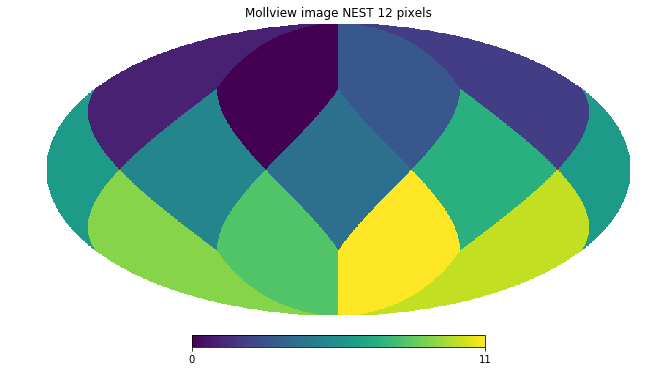

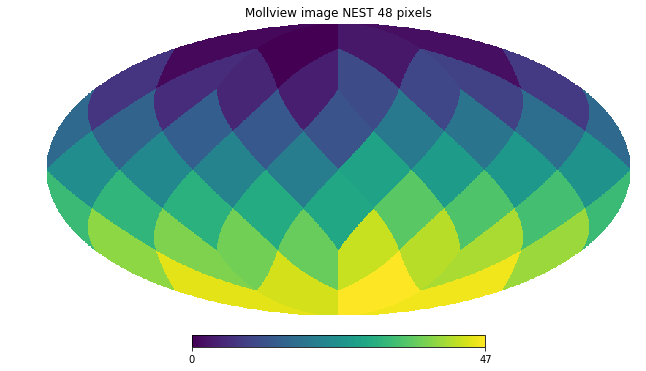

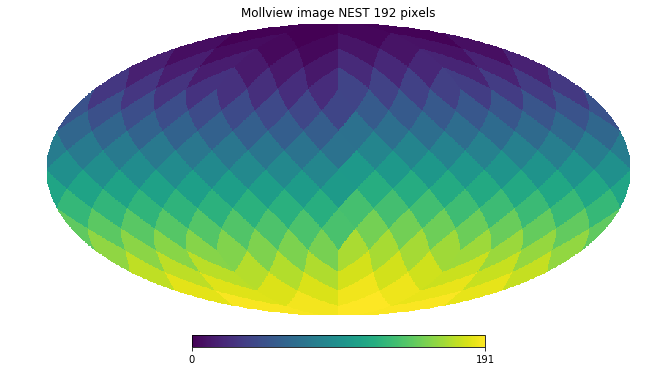

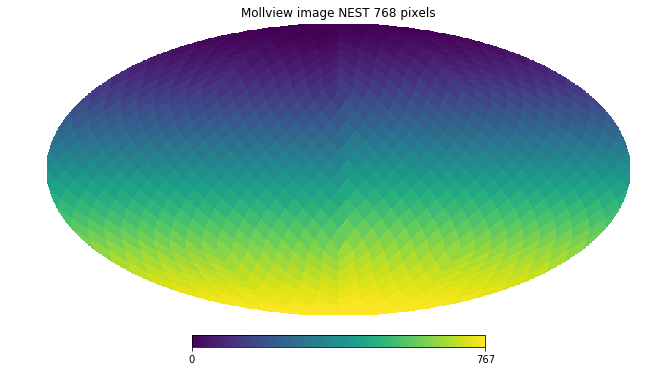

In [2]:
import numpy as np
import healpy as hp
NSIDE = 1
m = np.arange(hp.nside2npix(NSIDE))
hp.mollview(m, title="Mollview image NEST 12 pixels")
NSIDE = 2
m = np.arange(hp.nside2npix(NSIDE))
hp.mollview(m, title="Mollview image NEST 48 pixels")
NSIDE = 4
m = np.arange(hp.nside2npix(NSIDE))
hp.mollview(m, title="Mollview image NEST 192 pixels")
NSIDE = 8
m = np.arange(hp.nside2npix(NSIDE))
hp.mollview(m, title="Mollview image NEST 768 pixels")

**Segunda:** El área de los pixeles a una dada resolución es la misma.

**Tercera:** Los pixeles están distribuidos en líneas de latitud constante. Esta propiedad es esencial para el análisis de armónicos esféricos. Debido a esta distribución en isolatitud la velociad de computo de las las integrales sobre armónicos esféricos individuales escala a $N^{1/2}$ con el número total de pixeles, en lugar de una escala N como en métodos como el cubo cuadrilateralizado esférico (usado en COBE).

## Lectura y visualización de mapas

In [3]:
planck_wMW=hp.read_map('COM_CompMap_dust-commander_0256_R2.00.fits')

NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


/Users/jgallegos/anaconda/lib/python3.6/site-packages/healpy/projaxes.py:859: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[np.isinf(val.data)] = -np.inf


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


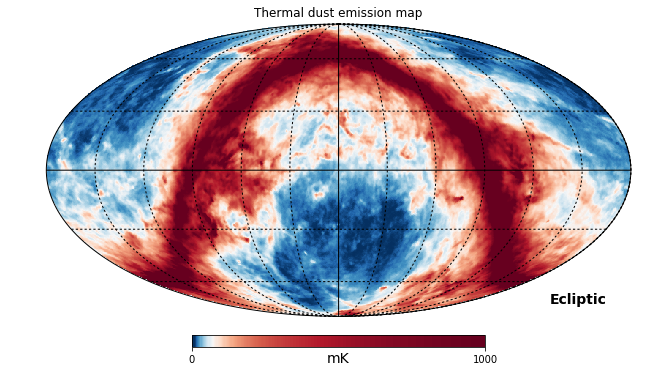

In [12]:
hp.mollview(planck_wMW, coord=['G','E'],min=0, max=1000, title='Thermal dust emission map', unit='mK', 
            norm='hist', cmap=cmap)
hp.graticule()